## 시계열 분석해보기(환율)

### 1. 데이터불러오기

c:\Users\OPERATOR-70\AppData\Local\Programs\Python\Python39\lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


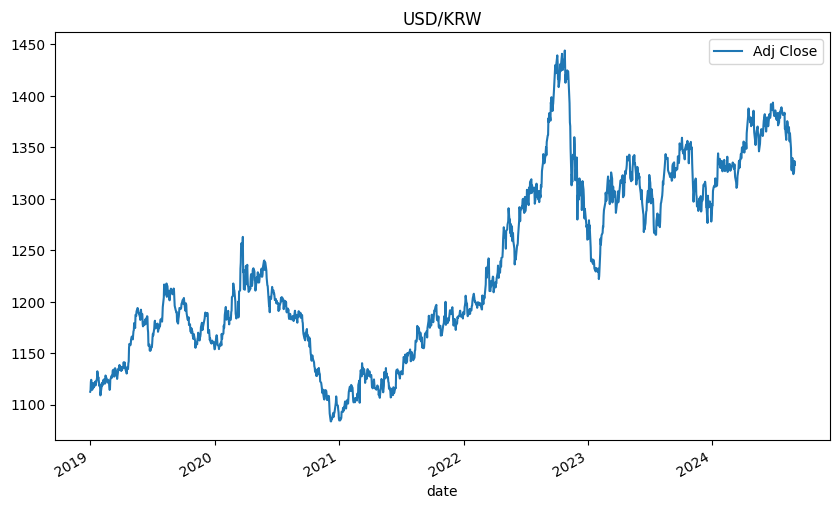

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

start_date = '2019-01-01'
end_date = '2024-08-31'
data = yf.download('USDKRW=X',start=start_date, end=end_date)
df = data[["Adj Close"]]

# 그래프 그리기
df.plot(kind='line', figsize=(10, 6))

# 그래프에 제목과 라벨 추가
plt.title('USD/KRW')
plt.xlabel('date')

# 그래프 보여주기
plt.show()

### 2. 정상성 확인하기(ADF)
- ADF를 이용해서 정상성을 확인할 수 있고 p-value가 0.05 이상이면 비정상성 0.05 이하이면 정상성이라고 본다.

In [7]:
from statsmodels.tsa.stattools import adfuller

# ADF 테스트 수행
result = adfuller(df)

# ADF 테스트 결과 출력
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.379099
p-value: 0.592254


### 3. 데이터 차분하기

C:\Users\OPERATOR-70\AppData\Local\Temp\ipykernel_13680\1267468658.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff'] = df['Adj Close'].diff()


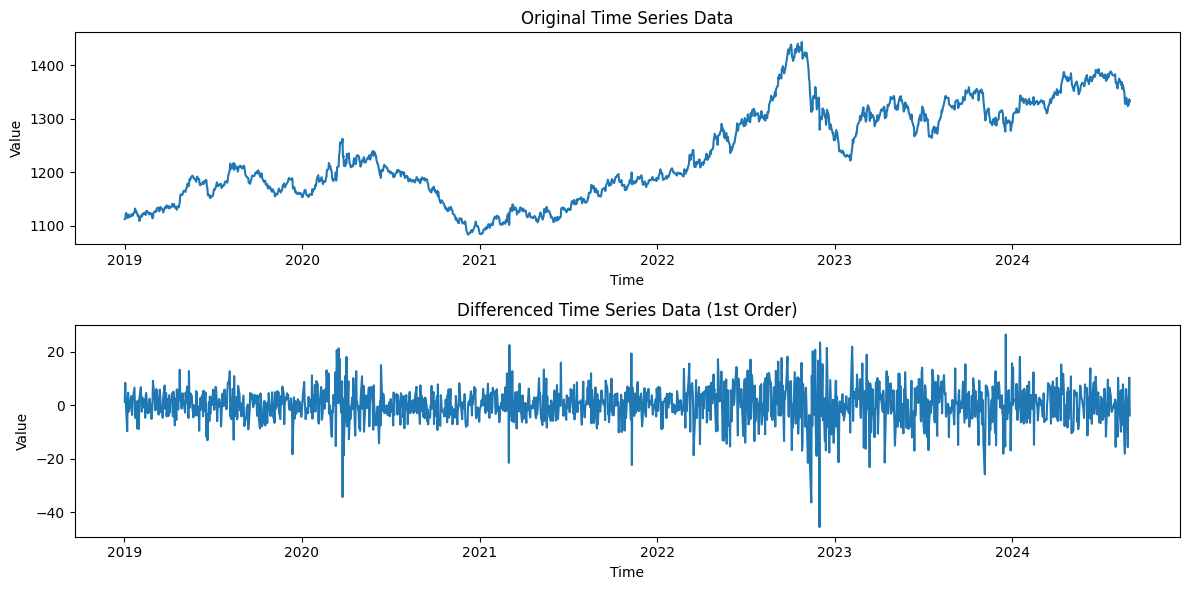

ADF Statistic: -16.737362
p-value: 0.000000


In [8]:
# 원본 시계열 데이터 시각화
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['Adj Close'])
plt.title('Original Time Series Data')
plt.xlabel('Time')
plt.ylabel('Value')

# 1차 차분
df['diff'] = df['Adj Close'].diff()

# 차분된 시계열 데이터 시각화
plt.subplot(2, 1, 2)
plt.plot(df.index[1:], df['diff'].dropna())  # 차분 후 첫 번째 값은 NaN이므로 제외
plt.title('Differenced Time Series Data (1st Order)')
plt.xlabel('Time')
plt.ylabel('Value')

plt.tight_layout()
plt.show()

# ADF 테스트 수행
result = adfuller(df['diff'].dropna())

# ADF 테스트 결과 출력
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

### 4. 차분 후의 시계열

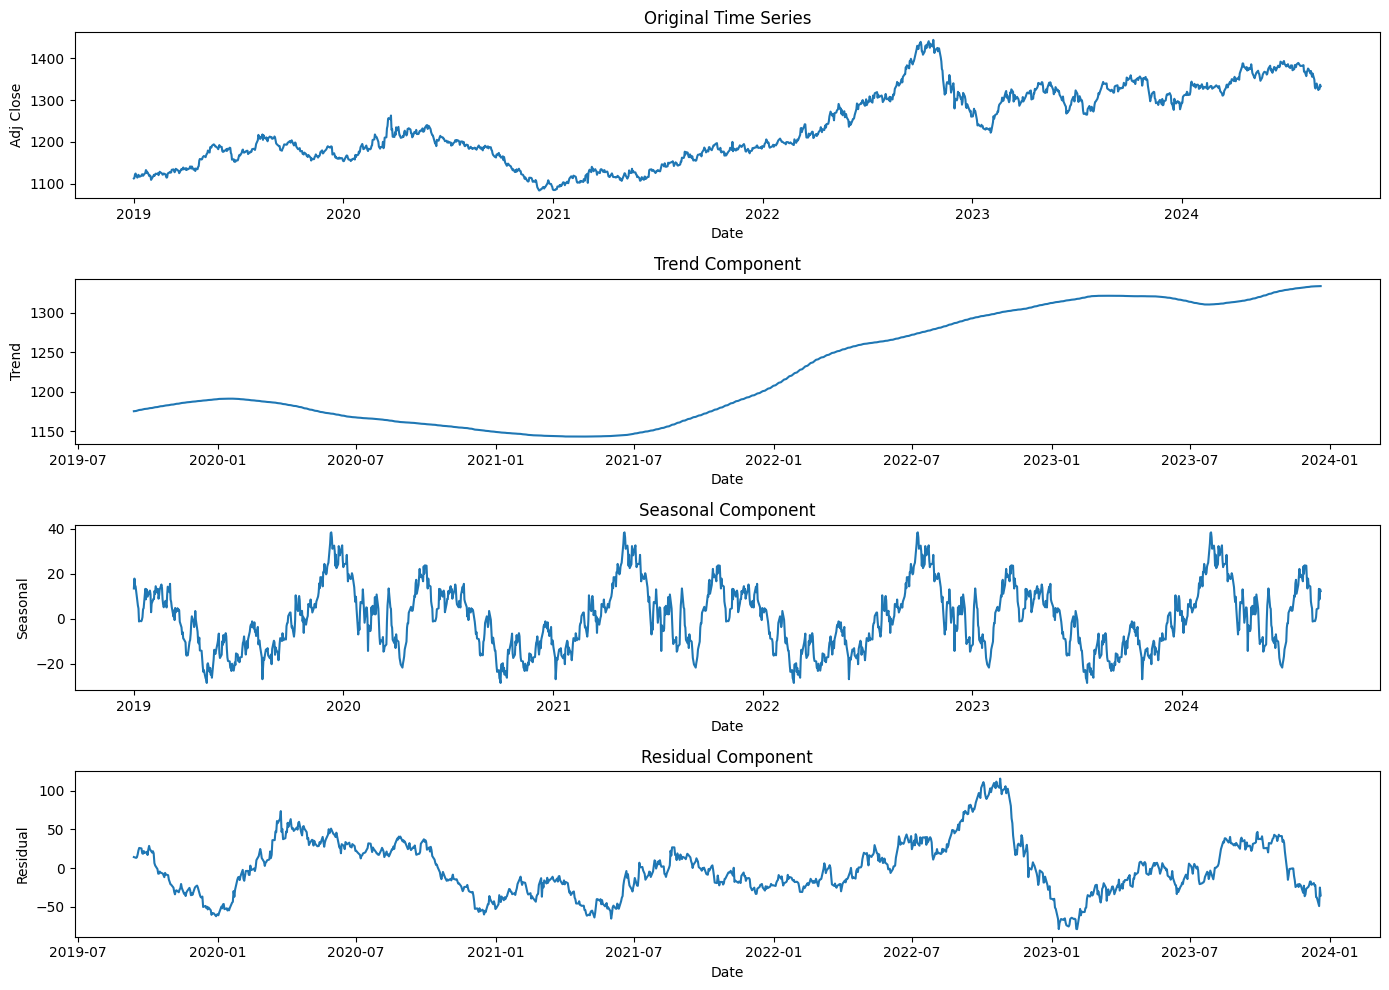

In [11]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 데이터 분해
decomposition = seasonal_decompose(df['Adj Close'], model='additive', period=365)

# 분해된 성분 시각화
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(df['Adj Close'])
plt.title('Original Time Series')
plt.xlabel('Date')
plt.ylabel('Adj Close')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend)
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal)
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid)
plt.title('Residual Component')
plt.xlabel('Date')
plt.ylabel('Residual')

plt.tight_layout()
plt.show()